<a href="https://colab.research.google.com/github/DrAlexSanz/nlpv2-course/blob/master/Spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB
from sklearn.linear_model import PassiveAggressiveClassifier
from wordcloud import WordCloud

In [35]:
# Get the data

!wget https://lazyprogrammer.me/course_files/spam.csv

--2022-07-06 12:51:56--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv.4’

spam.csv.4          100%[===================>] 491.86K  1.40MB/s    in 0.3s    

2022-07-06 12:51:57 (1.40 MB/s) - ‘spam.csv.4’ saved [503663/503663]



In [36]:
df = pd.read_csv("spam.csv", encoding = "ISO-8859-1")

In [37]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [38]:
# Drop weird columns

df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
df.columns = ["labels", "data"]
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


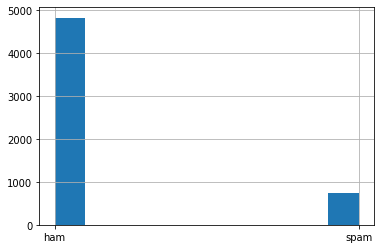

In [39]:
# See if it's 50-50

df["labels"].hist() # There are very few spam emails, imbalanced as the golden customers

In [40]:
# Create binary labels. Scikit learn now accepts strings as labels but let's do it binary in case I want to use something else in the future

df["b_labels"] = df["labels"].map({"ham": 0, "spam": 1})
y = df["b_labels"].to_numpy()

In [41]:
# Split data

x_train_text, x_test_text, y_train, y_test = train_test_split(df["data"], y, test_size = 0.2)
x_train_text.head()

2010    Dunno lei... I thk mum lazy to go out... I nev...
3492                      Cool, text me when you head out
3436                        Then what about further plan?
4873                     Wat happened to the cruise thing
3171    Do u still have plumbers tape and a wrench we ...
Name: data, dtype: object

In [44]:
# Create training matrix

featurizer = CountVectorizer(decode_error = "ignore") # Try TFidf vectorizer
x_train = featurizer.fit_transform(x_train_text)
x_test = featurizer.transform(x_test_text)
x_train

<4457x7801 sparse matrix of type '<class 'numpy.int64'>'
	with 59346 stored elements in Compressed Sparse Row format>

In [ ]:
model = MultinomialNB()

model.fit(x_train, y_train)